In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

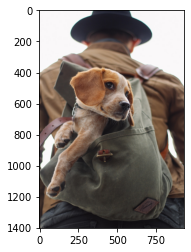

In [6]:
plt.imshow(img1)

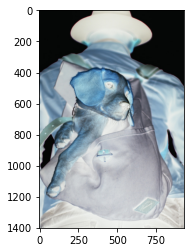

In [39]:
plt.imshow(cv2.bitwise_not(img1))

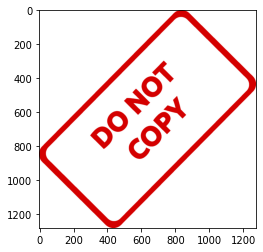

In [7]:
plt.imshow(img2)

In [8]:
img1.shape

(1401, 934, 3)

In [9]:
img2.shape

(1280, 1277, 3)

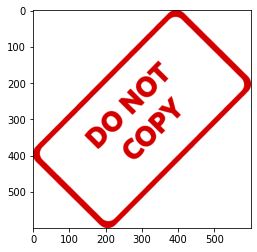

In [10]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

In [11]:
img1.shape

(1401, 934, 3)

In [12]:
x_offset = 934 - 600
y_offset = 1401-600

In [13]:
img2.shape

(600, 600, 3)

In [14]:
rows, cols , channels = img2.shape

In [15]:
rows

600

In [16]:
cols

600

In [17]:
channels

3

In [18]:
roi = img1[y_offset:1401, x_offset:943]

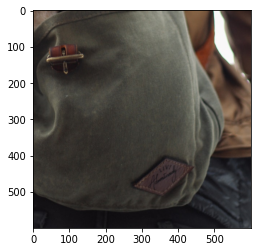

In [20]:
plt.imshow(roi)

In [21]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

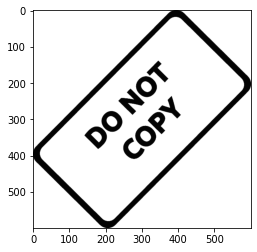

In [23]:
plt.imshow(img2gray, cmap = 'gray')

In [42]:
img2gray.shape

(600, 600)

In [24]:
mask_inv = cv2.bitwise_not(img2gray)

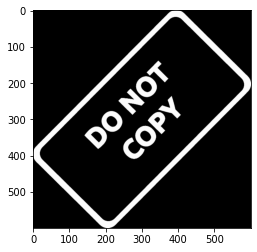

In [41]:
plt.imshow(mask_inv, cmap = 'gray')

In [28]:
mask_inv.shape

(600, 600)

In [30]:
white_background = np.full(img2.shape, 255, dtype = np.uint8)

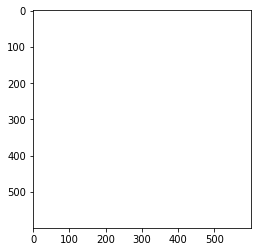

In [31]:
plt.imshow(white_background)

In [32]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [33]:
bk = cv2.bitwise_or(white_background, white_background, mask = mask_inv)

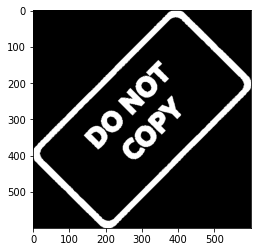

In [34]:
plt.imshow(bk)

In [48]:
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)

In [50]:
roi.shape

(600, 600, 3)

In [51]:
mask_inv.shape

(600, 600)

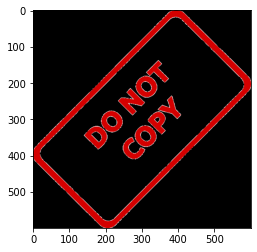

In [49]:
plt.imshow(fg)

In [52]:
final_roi = cv2.bitwise_or(roi,fg)

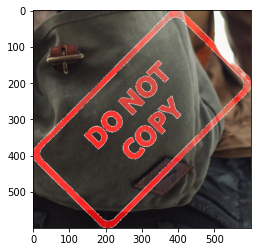

In [53]:
plt.imshow(final_roi)

In [54]:
large_img = img1
small_img = final_roi

In [55]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

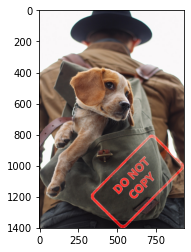

In [56]:
plt.imshow(large_img)